## Import distinctipy

In [1]:
from distinctipy import distinctipy
from distinctipy import colorblind
from distinctipy import examples

import matplotlib.pyplot as plt
%matplotlib inline

## Generating Colours

Say you have already used red, green, blue, white and black in your application. What should you use next? Distinctipy can help by generating new colours as distinct from red, green, blue, white, black (and each other) as possible.

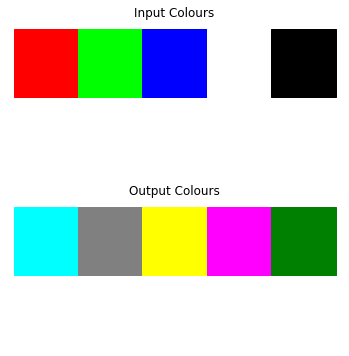

In [2]:
# rgb colour values (floats between 0 and 1)
RED = (1, 0, 0)
GREEN = (0, 1, 0)
BLUE = (0, 0, 1)
WHITE = (1, 1, 1)
BLACK = (0, 0, 0)

# generated colours will be as distinct as possible from these colours
input_colors = [RED, GREEN, BLUE, WHITE, BLACK]

# generate 5 new colours
output_colors = distinctipy.get_colors(5, input_colors)

# display the colours
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
distinctipy.color_swatch(input_colors, ax=axes[0], title='Input Colours')
distinctipy.color_swatch(output_colors, ax=axes[1], title='Output Colours')


## N colours

*distinctipy* can be used to generate N visually distinct colours. A list of colours to avoid can be passed (as in the example above via the parameter exclude_colors), or by default distinctipy.get_colors will avoid black and white.

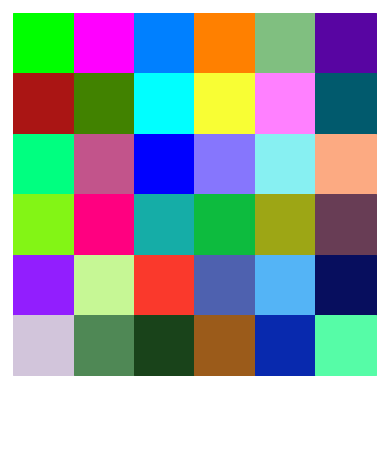

In [3]:
# generate 36 distinct colours (excluding black and white by default)
colors = distinctipy.get_colors(36)

# display the colours
distinctipy.color_swatch(colors)

## Pastel Factor

A pastel_factor parameter can be given, in which case paler colours will be generated.

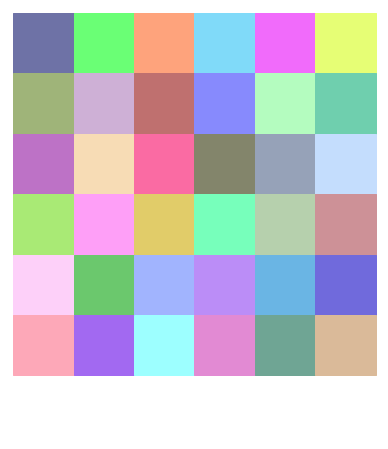

In [4]:
# generate 36 distinct pastel colours
colors = distinctipy.get_colors(36, pastel_factor=0.7)

# display the colours
distinctipy.color_swatch(colors)

## Text and Inverted Colours

*distinctipy* provides functionality to determine whether white or black text should be used over a given background colour, and to invert an input colour (generate the maximally distinct colour from each individual colour in an input list).

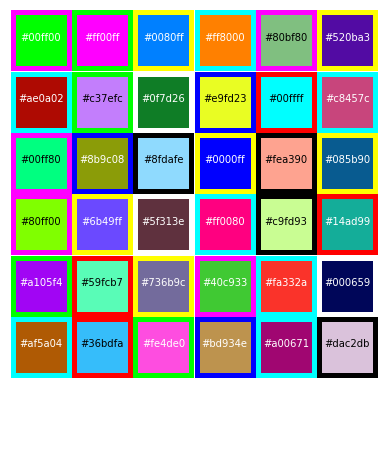

In [5]:
# generate 36 distinct colours
colors = distinctipy.get_colors(36)

# generate a colour as distinct as possible from each colour in colors
inverted = distinctipy.invert_colors(colors)

# pick black or white text for each colour
text = [distinctipy.get_text_color(color) for color in colors]

# display main colours, inverted colours and text
distinctipy.color_swatch(colors, edgecolors=inverted, show_text=True)

## Compared with Other Colour Maps

*distinctipy* comes with some example datasets (from http://cs.joensuu.fi/sipu/datasets/) which can be used to show how it performs compared to other common colour maps available in matplotlib. Or you can directly compare colour swatches.

*distinctipy* avoids repeating colours, typically uses a wider range of colours, and gives a better/more random ordering of colours.

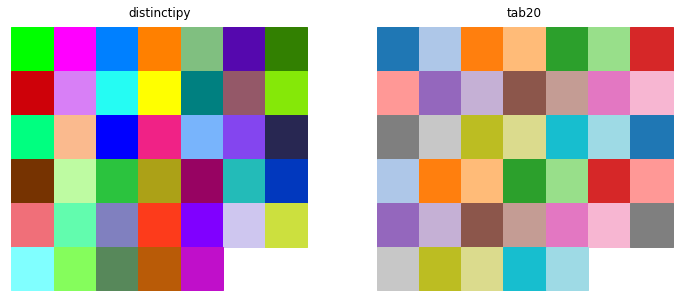

In [6]:
# compare 40 colours generated with the distinctipy and tab20 colour palettes
examples.compare_colors(N=40, compare_with='tab20')

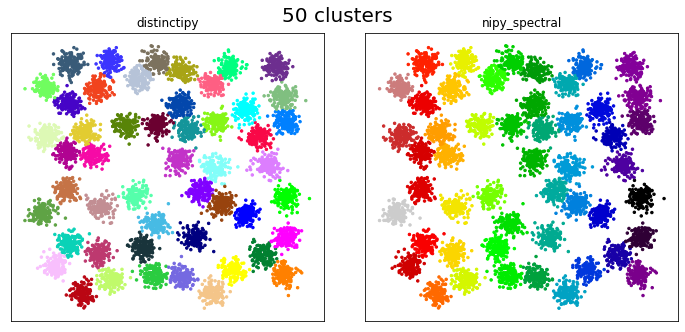

In [7]:
# compare distinctipy and nipy_spectral colourmaps for a 50 cluster dataset
examples.compare_clusters('a3', compare_with='nipy_spectral')

## Colourblindness: Image Simulation

*distinctipy* can simulate what an image looks like with different types of colourblindness. You can find some example images to try in the examples directory in the GitHub repo.

Types of colour blindness that can be simulated are:
* **Red-green**: Protanopia, Protanomaly, Deuteranopia, Deuteranomaly (most common type)
* **Blue-yellow**: Tritanopia, Tritanomaly
* **Total**: Achromatopsia, Achromatomaly

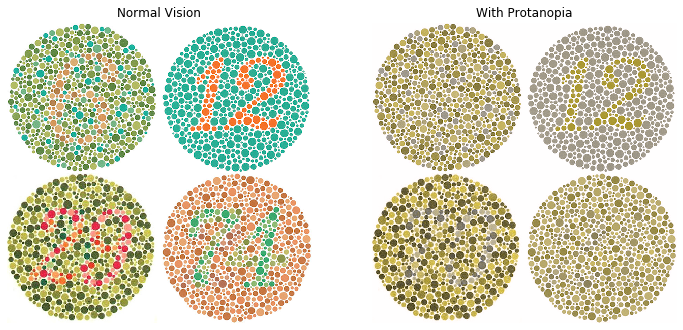

In [8]:
# path to image (PNG only)
img_path = 'https://raw.githubusercontent.com/alan-turing-institute/distinctipy/master/distinctipy/datasets/test.png'

# type of colourblindness to simulate
colorblind_type = 'Protanopia'

# compare appearance of image with and without colourblindness
colorblind.simulate_image('distinctipy/datasets/test.png',
                          colorblind_type)

## Better Colour Palettes for Colourblindness

*distinctipy* can use the colourblindness filters used above to try to generate colours that are as distinct as possible for a given type of colourblindness (i.e. maximising the distinction between the simulated colours rather than the colours themselves).

Colours distinct for normal vision:


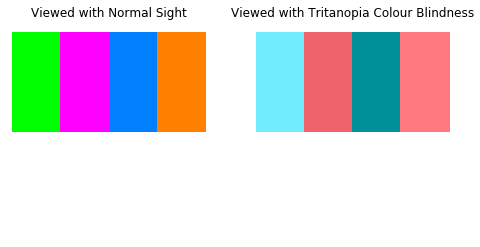

Colours distinct for Tritanopia colourblindness:


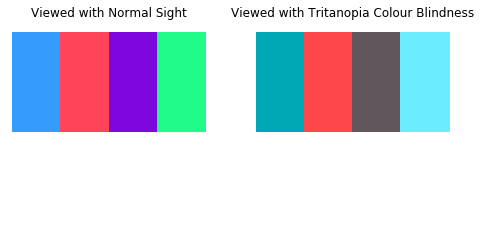

In [9]:
# type of colourblindness to simulate
colorblind_type = 'Tritanopia'

# number of colours to generate
N = 4

# how default distinctipy colours look for Tritanopia
print('Colours distinct for normal vision:')
norm_colors = distinctipy.get_colors(N, colorblind_type=None)
colorblind.simulate_colors(norm_colors, colorblind_type=colorblind_type)

# how colours optimised for distinction with Tritanopia look
print('Colours distinct for '+colorblind_type+' colourblindness:')
blind_colors = distinctipy.get_colors(N, colorblind_type=colorblind_type)
colorblind.simulate_colors(blind_colors, colorblind_type=colorblind_type)

## Example: Clusters with Colourblindness

Compare the appearance of coloured clusters with and without attempting to correct for colourblindness.

Colours distinct for normal vision:


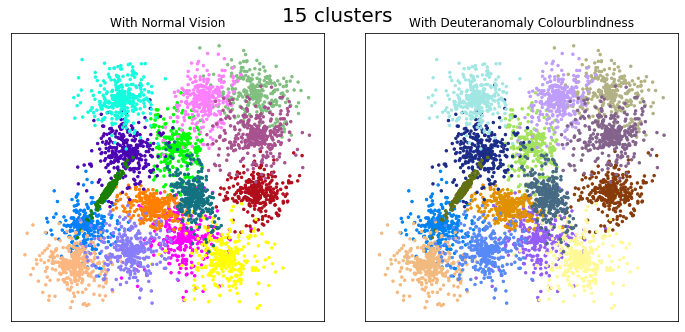

Colours distinct for Deuteranomaly colourblindness:


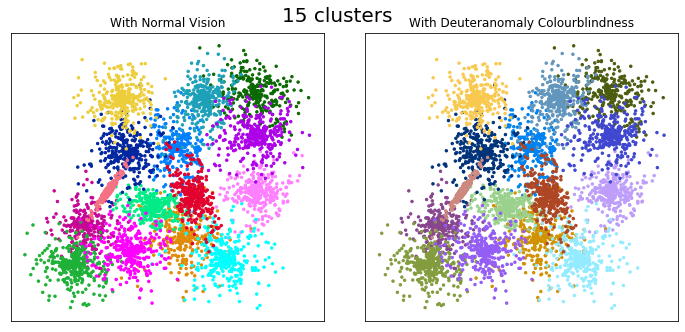

In [10]:
colorblind_type = 'Deuteranomaly'
dataset = 's3'

print('Colours distinct for normal vision:')
colorblind.simulate_clusters(dataset=dataset, 
                             colorblind_type=colorblind_type, colorblind_distinct=False)

print('Colours distinct for '+colorblind_type+' colourblindness:')
colorblind.simulate_clusters(dataset=dataset, 
                             colorblind_type=colorblind_type, colorblind_distinct=True)